In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [50]:
from keras.datasets import mnist
mnist_dataset = mnist.load_data()

In [51]:
(train_data, train_labels),(X_test, y_test) = mnist_dataset

In [52]:
# old_train = pd.read_csv('mnist_train.csv')
# test_data = pd.read_csv('mnist_test.csv')

#### Data Normalization

In [53]:
import numpy as np
from keras.utils.np_utils import to_categorical

train_data = np.array([image.flatten() for image in train_data])
X_test = np.array([image.flatten() for image in X_test])

train_labels,y_test = train_labels.ravel(),y_test.ravel()

train_labels, y_test = to_categorical(train_labels), to_categorical(y_test)

In [54]:
train_data = train_data / 255
X_test = X_test / 255

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_validation,y_train, y_validation = train_test_split(train_data,train_labels,test_size=0.2,stratify=train_labels,random_state=7)

In [56]:
# first_image = np.reshape(np.array(train_data.iloc[2,1:]),(28,28))
# plt.imshow(first_image,cmap='gray')


## Model creation

In [57]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(y_train) 
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model
from keras.optimizers import SGD
def newModel(optimizer = SGD(lr = 0.01)):
    model = Sequential()
    model.add(Dense(128,input_dim=28*28))
    model.add(Activation(activation='relu'))
    model.add(Dense(64))
    model.add(Activation(activation='relu'))
    model.add(Dense(10))
    model.add(Activation(activation='softmax'))
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['categorical_accuracy'])
    return model


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [59]:
def plotLAA(hist):
    loss_list = hist.history['loss']
    accuaracy_list = hist.history['categorical_accuracy']
    val_loss_list = hist.history['val_loss']
    val_accuaracy_list = hist.history['val_categorical_accuracy']
    plt.figure(figsize=(10, 6))
    plt.subplot(2,2,1)
    plt.plot(loss_list,color='red')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(2,2,2)
    plt.plot(accuaracy_list)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.subplot(2,2,3)
    plt.plot(val_loss_list,color='red')
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.subplot(2,2,4)
    plt.plot(val_accuaracy_list)
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')

In [60]:
def printResult(start,end,hist):
    print(f'- Learning time = {end-start}s')
    for key,value in zip(hist.history.keys(),hist.history.values()):
        print(key,value[-1])
    plotLAA(hist)

In [61]:
def plot3Te(hist1,hist2,hist3):
    plt.figure(figsize=(10, 6))
    plt.subplot(2,2,1)
    plt.plot(hist1[0].history['loss'],label=hist1[1])
    plt.plot(hist2[0].history['loss'],label=hist2[1])
    plt.plot(hist3[0].history['loss'],label=hist3[1])
    plt.title('loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(2,2,2)
    plt.plot(hist1[0].history['categorical_accuracy'],label=hist1[1])
    plt.plot(hist2[0].history['categorical_accuracy'],label=hist2[1])
    plt.plot(hist3[0].history['categorical_accuracy'],label=hist3[1])
    plt.title('accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    
    plt.subplot(2,2,3)
    plt.plot(hist1[0].history['val_loss'],label=hist1[1])
    plt.plot(hist2[0].history['val_loss'],label=hist2[1])
    plt.plot(hist3[0].history['val_loss'],label=hist3[1])
    plt.title('val_loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend()
    plt.subplot(2,2,4)
    plt.plot(hist1[0].history['val_categorical_accuracy'],label=hist1[1])
    plt.plot(hist2[0].history['val_categorical_accuracy'],label=hist2[1])
    plt.plot(hist3[0].history['val_categorical_accuracy'],label=hist3[1])
    plt.title('val_accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [88]:
start = time.time()

model = newModel()
sgd_hist = model.fit(X_train,y_train,epochs = 2,batch_size=1,verbose=0,validation_data = (X_validation,y_validation))

end = time.time()


- Learning time = 182.42104649543762s
loss 0.11329953372478485
categorical_accuracy 0.9650624990463257
val_loss 0.11990547925233841
val_categorical_accuracy 0.9642500281333923


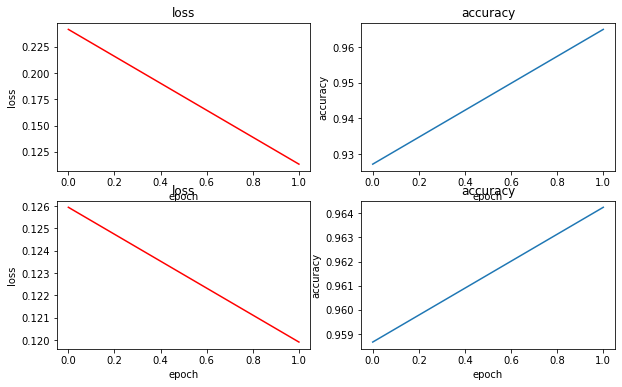

In [90]:
printResult(start,end,sgd_hist)

In [78]:
start1 = time.time()

model = newModel()
mini_batch_hist = model.fit(X_train,y_train,epochs=50,batch_size=64,verbose=0,validation_data = (X_validation,y_validation))

end1 = time.time()

- Learning time = -534.8954949378967s
loss 0.050902578979730606
categorical_accuracy 0.9866874814033508
val_loss 0.0975746437907219
val_categorical_accuracy 0.9709166884422302


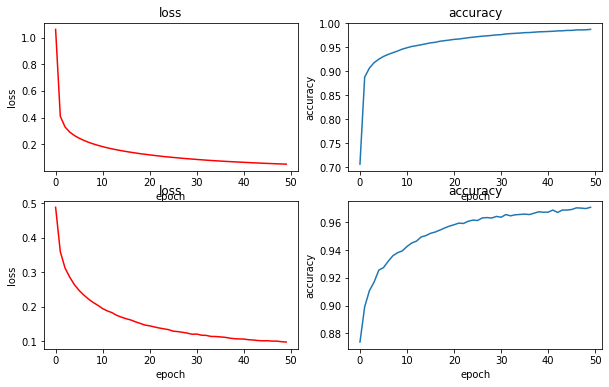

In [69]:
printResult(start1,end1,mini_batch_hist)

In [70]:
start2 = time.time()

model = newModel()
batch_hist = model.fit(X_train,y_train,epochs=50,batch_size=len(X_train),verbose=0,validation_data = (X_validation,y_validation))

end2 = time.time()

- Learning time = 41.58811950683594s
loss 2.1005825996398926
categorical_accuracy 0.3918333351612091
val_loss 2.0944344997406006
val_categorical_accuracy 0.3968333303928375


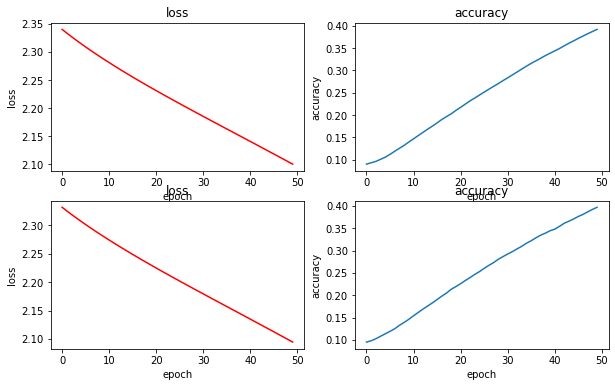

In [71]:
printResult(start2,end2,batch_hist)

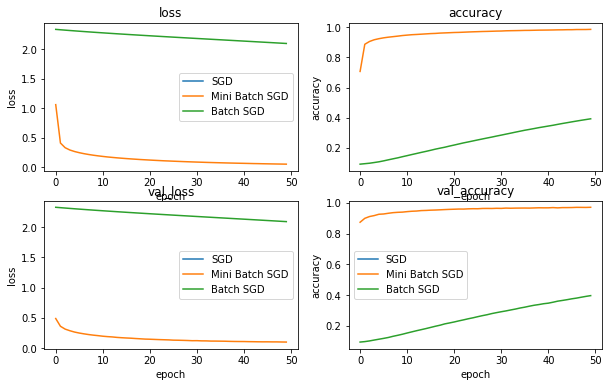

In [72]:
plot3Te((sgd_hist,'SGD'),(mini_batch_hist,'Mini Batch SGD'),(batch_hist,'Batch SGD'))

### 5 - Comparing

#### a - Mini batch SGD

In [73]:
import time 

start3 = time.time()

model = newModel()
mini_batch_hist1 = model.fit(X_train,y_train,epochs=10,batch_size=64,verbose = 0,validation_data = (X_validation,y_validation))
end3 = time.time()



- Learning time = 41.62643647193909s
loss 0.19575688242912292
categorical_accuracy 0.9445833563804626
val_loss 0.20550522208213806
val_categorical_accuracy 0.9424999952316284


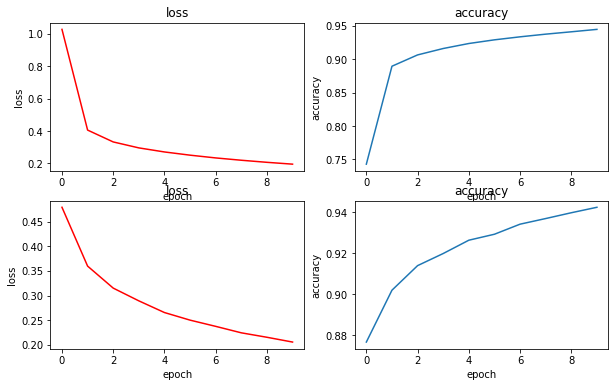

In [74]:
printResult(start3,end3,mini_batch_hist1)

#### b - Mini batch SGD with decay

In [75]:
start4 = time.time()

model = newModel(optimizer=SGD(lr=0.01, decay=1e-6))
mini_batch_hist2 = model.fit(X_train,y_train,epochs=10,batch_size=64,verbose = 0,validation_data = (X_validation,y_validation))

end4 = time.time()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


- Learning time = 26.302931547164917s
loss 0.1965116560459137
categorical_accuracy 0.9437708258628845
val_loss 0.20902161300182343
val_categorical_accuracy 0.9392499923706055


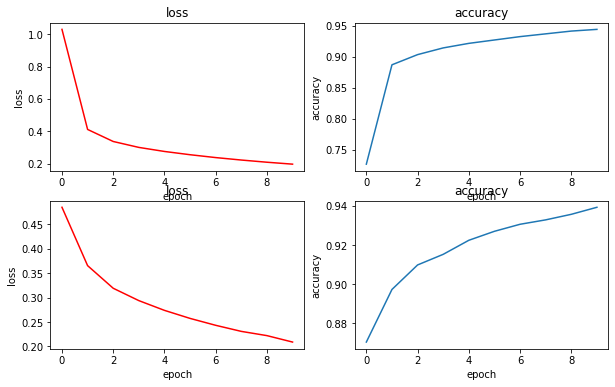

In [76]:
printResult(start4,end4,mini_batch_hist2)

#### c - SGD with decay and momentum

In [89]:
start5 = time.time()

model = newModel(optimizer=SGD(lr=0.01, decay=1e-6,momentum=0.9))
sgd_hist1 = model.fit(X_train,y_train,epochs=5,batch_size=1,verbose = 0,validation_data = (X_validation,y_validation))

end5 = time.time()

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


- Learning time = 489.7528007030487s
loss 2.31996750831604
categorical_accuracy 0.1040833368897438
val_loss 2.3229875564575195
val_categorical_accuracy 0.10216666758060455


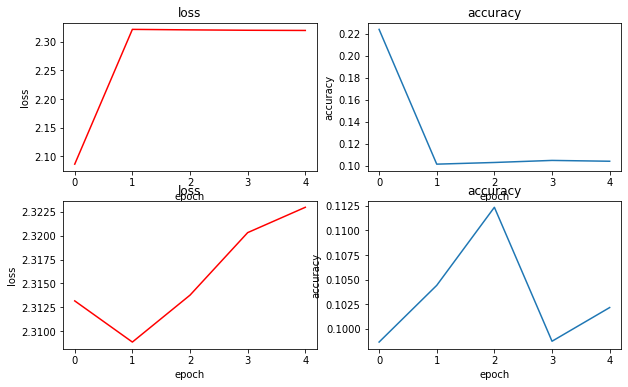

In [91]:
printResult(start5,end5,sgd_hist1)

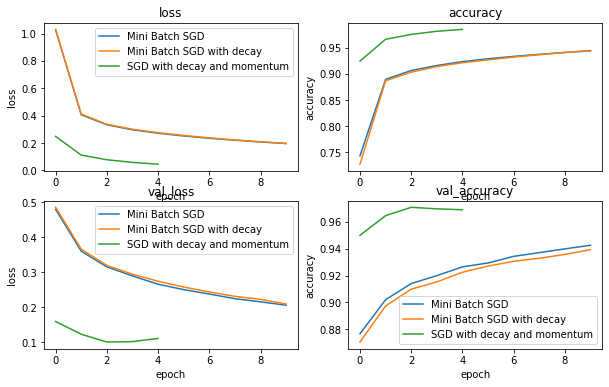

In [80]:
plot3Te((mini_batch_hist1,'Mini Batch SGD'),(mini_batch_hist2,'Mini Batch SGD with decay'),(sgd_hist1,'SGD with decay and momentum'))

### 6

#### SGD

In [81]:
start6 = time.time()

model = newModel()
sgd_hist2 = model.fit(X_train,y_train,epochs=3,verbose = 0,validation_data = (X_validation,y_validation))

end6 = time.time()


- Learning time = 12.552292346954346s
loss 0.26348742842674255
categorical_accuracy 0.9253958463668823
val_loss 0.2544439435005188
val_categorical_accuracy 0.9282500147819519


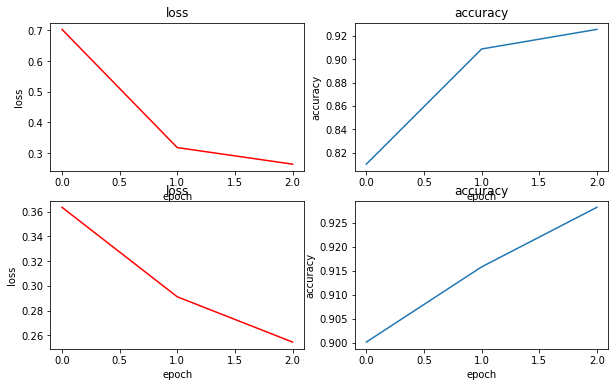

In [82]:
printResult(start6,end6,sgd_hist2)

#### Adam

In [83]:
from keras.optimizers import Adam
start7 = time.time()

model = newModel(Adam(lr = 0.001))
sgd_hist3 = model.fit(X_train,y_train,epochs=3,verbose = 0,validation_data = (X_validation,y_validation))

end7 = time.time()


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


- Learning time = 13.710025072097778s
loss 0.0761643797159195
categorical_accuracy 0.976604163646698
val_loss 0.10725073516368866
val_categorical_accuracy 0.9671666622161865


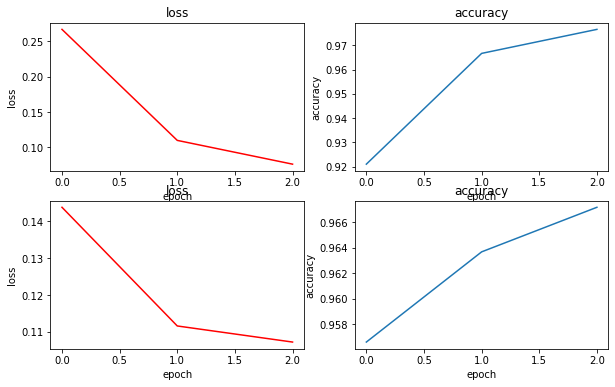

In [84]:
printResult(start7,end7,sgd_hist3)

#### RmsProp

In [85]:
from keras.optimizers import RMSprop
start8 = time.time()

model = newModel(RMSprop(lr = 0.001))
sgd_hist4 = model.fit(X_train,y_train,epochs=3,verbose = 0,validation_data = (X_validation,y_validation))

end8 = time.time()


/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


- Learning time = 21.398375749588013s
loss 0.08580615371465683
categorical_accuracy 0.9751250147819519
val_loss 0.11583712697029114
val_categorical_accuracy 0.9682499766349792


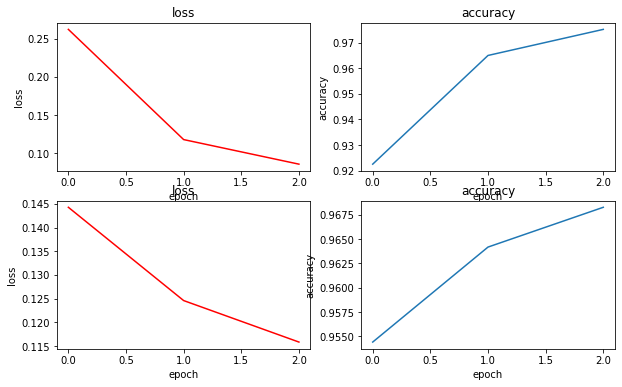

In [86]:
printResult(start8,end8,sgd_hist4)

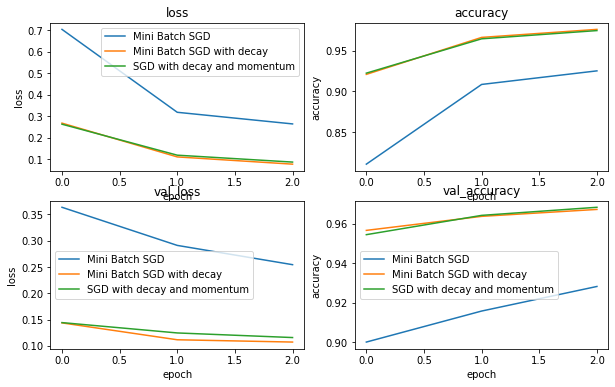

In [87]:
plot3Te((sgd_hist2,'Mini Batch SGD'),(sgd_hist3,'Mini Batch SGD with decay'),(sgd_hist4,'SGD with decay and momentum'))